## Decision Trees and Random Forests Examples



Decision trees are ML algorithms which work on classification of the data based on values of the data features. This can be as simple as a 'yes' or 'no' entry in a feature column, or it can be a decision between many options.

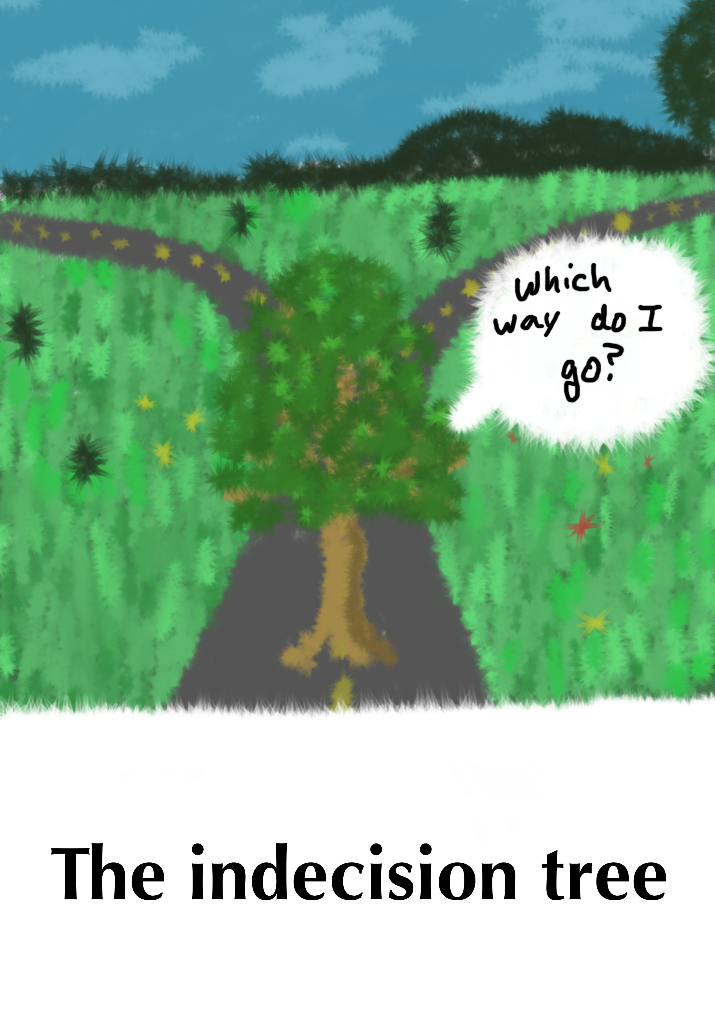
In trying to separate apples and oranges, we might ask is it red or green or orange? If it is red, we might subsequently ask if the skin is smooth (apple) or rough (a blood orange). You can have many levels of these decisions before you finally end at a conclusion about what you have.

When we fit decision trees to data, we are finding a selection of a feature to split the data at a node, and we try to select a feature to split on which would give us the maximum information about the data set at that node.

It is almost intuitive to understand how a decision tree works for classification if all the data is categorical. However, decision trees can also be used for regression on continous data. This is basically making a decision on whether a feature is greater than or less than some value.

Here are some libraries we will use later



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### A regression example



In engineering analysis, we are often trying to build models for *continuous* properties, which is a regression problem. In this example, we return to the data from the NIST web book 'Thermophysical Properties of Fluid Systems': [https://webbook.nist.gov/chemistry/fluid/](https://webbook.nist.gov/chemistry/fluid/)

Specifically, the data used here contains the properties of water at isochoric conditions and a density of 1000 kg/m3, between 0C to 100C.

We are interested in the pressure and temperature of water, which is taken from the data file below.



:RESULTS:
 : Text(0.5, 1.0, 'Isochoric Water at Density 1000 kg/m3')
 
 :END:

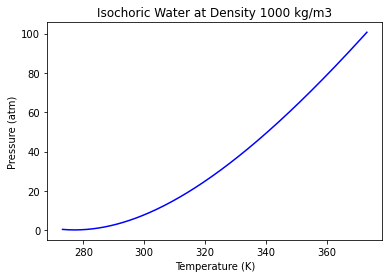

In [1]:
data = np.loadtxt('fluid.txt', delimiter='\t', skiprows = 1, usecols=(0, 1))

T = data[:, 0]
P = data[:, 1]

plt.plot(T, P, 'b-')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")

We will split this into train and test sets.



In [1]:
from sklearn.model_selection import train_test_split

X = T
y = P

(X_train, X_test,
 y_train, y_test) = train_test_split(X, y,
                                     test_size=0.2,
                                     shuffle=True,
                                     random_state=3)

The sklearn class we will be using for regression with decision trees is DecisionTreeRegressor.



In [1]:
from sklearn.tree import DecisionTreeRegressor

There are many hyperparameters in this class. One such hyperparameter is the choice of the algorithm to choose the best feature to split on. In DecisionTreeRegressor, the default is the mean square error approach, which we use here.

As we have seen several times, there is a standard API to fit and predict values.



R-Squared Score: 0.9996391359778751

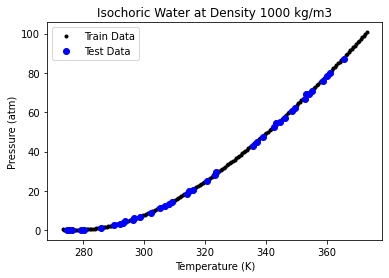

In [1]:
tree1 = DecisionTreeRegressor()

tree1.fit(X_train[:, np.newaxis], y_train)

Ptest = tree1.predict(X_test[:, np.newaxis])

# Plotting
plt.plot(X_train, y_train, 'k.', label = "Train Data")
plt.plot(X_test, Ptest, 'bo', label = 'Test Data')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")


# R-squared score of the model
print('R-Squared Score:', tree1.score(X_test[:, np.newaxis], y_test))

This looks like a good fit. But visually we are not able to see how a decision tree varies from any other regression approach. To see that, let us use a sparse data set, by taking a small number of points from the above data.



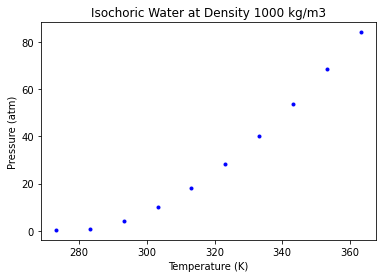

In [1]:
# Training Data
nT = T[0:-1:20]
nP = P[0:-1:20]

plt.plot(nT, nP, 'b.')
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3");

R-Squared Score: 0.9812453324434975

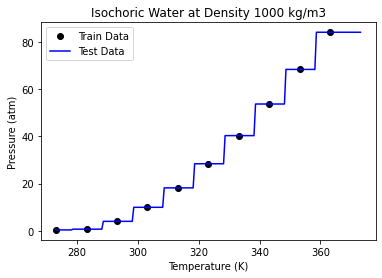

In [1]:
# Training data
nT = np.array(nT)[:, np.newaxis]

# Decision Tree Model
tree2 = DecisionTreeRegressor()

tree2.fit(nT, nP)

# Test Data, using the original data set
Ttest = T[:, np.newaxis]
Ptest = tree2.predict(Ttest)

# Plotting
plt.plot(nT, nP, 'ko', label = "Train Data")
plt.plot(Ttest, Ptest, 'b-',label = 'Test Data')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")

# R-squared score of the model
print('R-Squared Score:', tree2.score(Ttest, P))

We can now see that a decision tree does not follow the function approximation approach to regression. The decision tree divides the data set into different regions by drawing boundaries (vertical lines in the steps) to separate each data point. This is based on the mean squared error criteria. A split is chosen which gives the lowest mean squared error.

Although Decision trees are conceptually simple, you should be aware that the first derivatives are not continuous. This is not a good model to use if you need derivatives.

We can further understand how the boundaries are constructed is by actually visualizing the tree.

This is a common approach to visualize a decision tree.

[https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176](https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

Note this may not work for you if you have not installed graphviz ([https://www.graphviz.org/](https://www.graphviz.org/)). If you don't have it, don't worry about it now. It is not critical for anything other than visualization. We use pydotplus to generate these figures.



In [1]:
!pip install pydotplus &> /dev/null

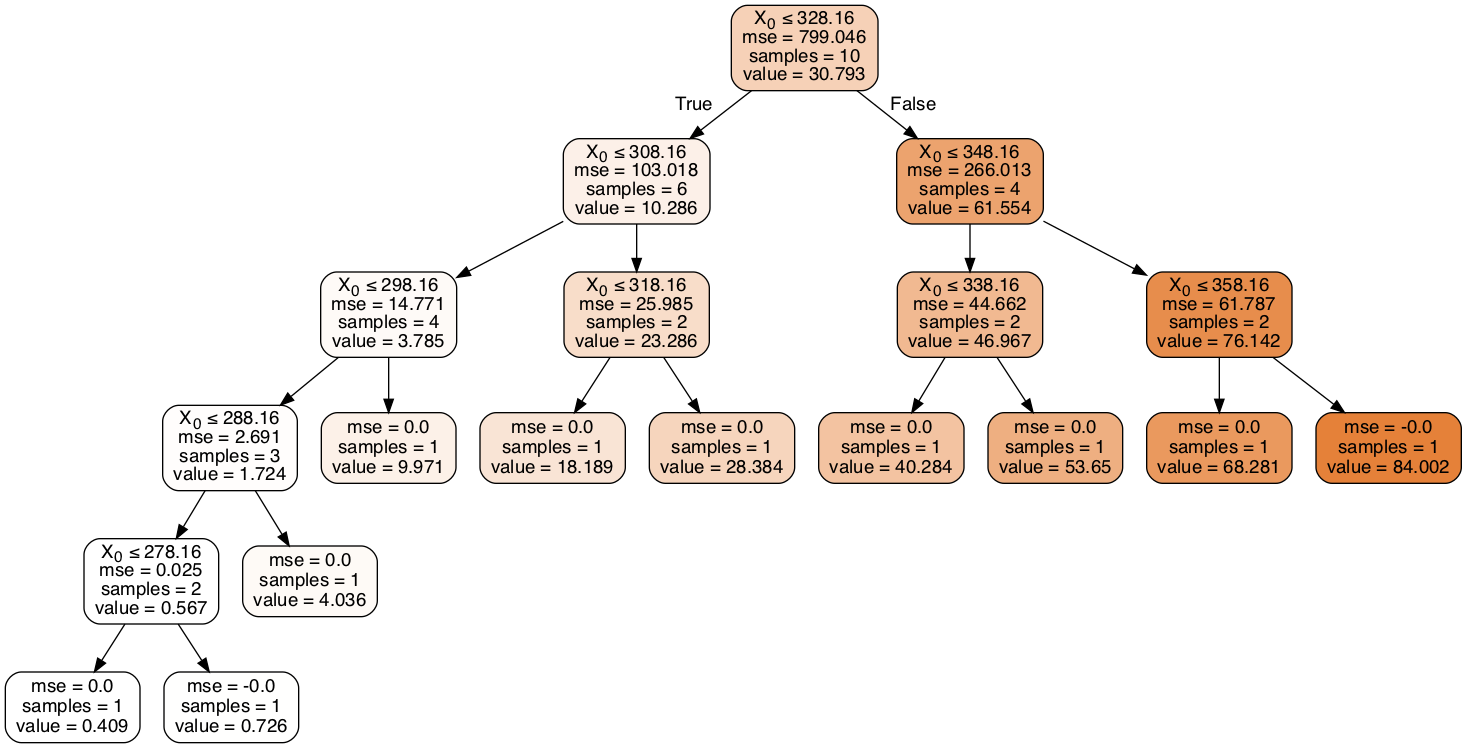

In [1]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(tree2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

As seen in the above image, the decision tree algorithm splits the data set based on a boundary which gives the minimum mean squared error. This process goes on until every data point is represented by an interval.

Note from Siddhant : From a classification point of view, this can be overfitting as we often need to prune the tree by reducing the number of splits or by restricting the maximum depth of the tree. However, here we know that the data is non-linear and a decision tree boundary will group together unequal data points if we stop splitting the data.



### Random Forest regression



A Random Forest algorithm uses multiple decision trees and determines the output either based on the mean or the median of all the individual outputs. Scikit-learn gives us the mean of all the trees.

**A Random Forest near a lake**
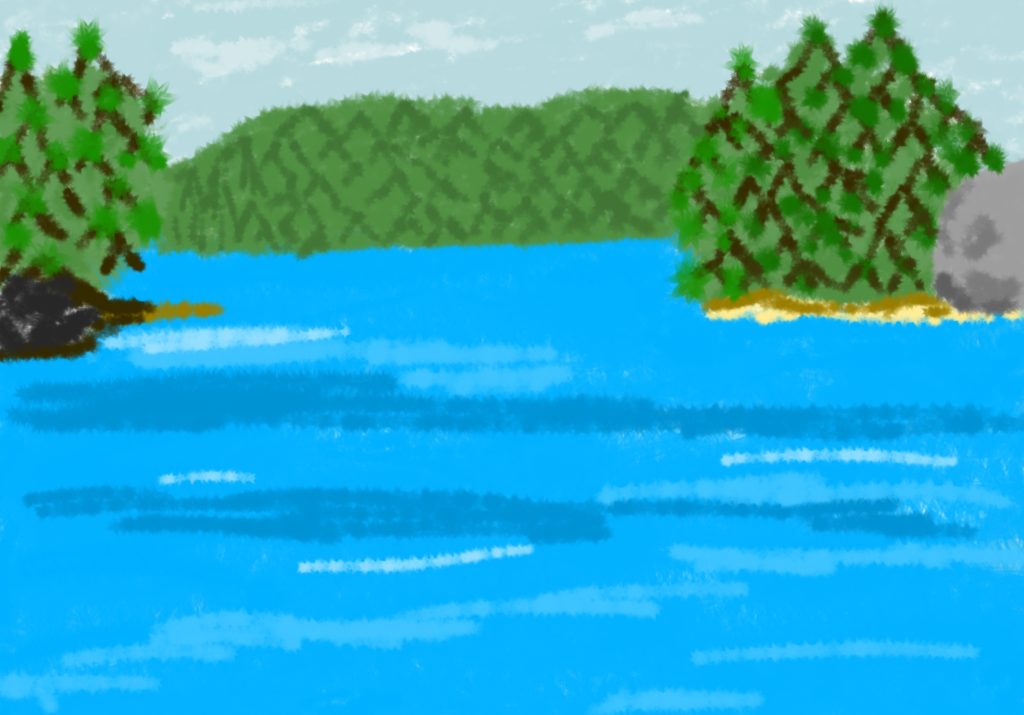

Some important hyperparameters for a random forest are:

`n_estimators`: number of trees

`max_features`: determines how many features from the original data set do we use for a single tree.

`bootstrap`: If False, every tree will use the whole data set to determine the output.

`max_samples`: determines how many samples will be considered by each individual tree, if bootstrap is true.

The sklearn class we will be using for random forest regression is `RandomForestRegressor`.

We will use the same sparse data set as earlier. Let us begin with one decision tree and bootstrap=False to replicate earlier results. Other hyperparameters can be default now as we will be using the entire data set.



R-Squared Score: 0.9812453324434975

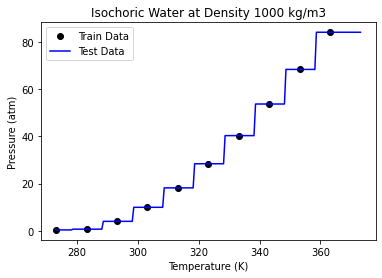

In [1]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1, bootstrap=False, random_state=5)

forest.fit(nT, nP)

# Test Data
Ttest = T[:, np.newaxis]
Ptest = forest.predict(Ttest)

# Plotting
plt.plot(nT, nP, 'ko', label='Train Data')
plt.plot(Ttest, Ptest, 'b-', label='Test Data')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")

# R-squared score of the model
print('R-Squared Score:', forest.score(Ttest, P))

This is exactly the model we got using the DecisionTreeRegressor. Now let us try to increase the number of trees. Here we need to set bootstrap = True, as we need to now allow random sampling of the training data for each tree. We will let the max\_sample hyperparameter be set to the default value of None, as being a small data set, we want to use all the available data for each tree.



R-Squared Score: 0.9670727428734641

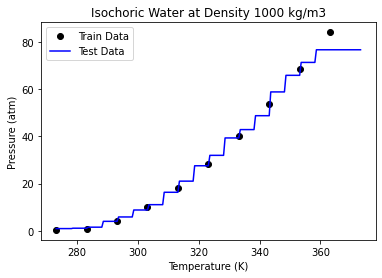

In [1]:
forest = RandomForestRegressor(n_estimators=50, bootstrap=True, random_state=3)

forest.fit(nT, nP)

# Test Data
Ttest = T[:, np.newaxis]
Ptest = forest.predict(Ttest)

# Plotting
plt.plot(nT, nP, 'ko', label='Train Data')
plt.plot(Ttest, Ptest, 'b-', label='Test Data')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (atm)')
plt.title("Isochoric Water at Density 1000 kg/m3")

# R-squared score of the model
print('R-Squared Score:', forest.score(Ttest, P))

We are getting a better accuracy with a 50 trees. If we look at the plot closely, we can also see that the boundaries here more in number than those obtained through a single decision tree.

Let us see how does the accuracy of the model vary with an increase in number of the trees. Note this takes 30-60 seconds to run.



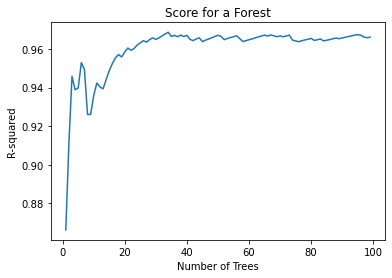

In [1]:
ntrees = range(1, 100)   # number of trees
score = []   # R-squared score of the model


for i in ntrees:
    forest = RandomForestRegressor(
        n_estimators=i,
        bootstrap=True,
        random_state=3)
    forest.fit(nT, nP)

    # Accuracy of the model
    score.append(forest.score(Ttest, P))

plt.plot(ntrees, score)
plt.title("Score for a Forest")
plt.xlabel("Number of Trees")
plt.ylabel("R-squared");

As we can see here, the accuracy of our model goes on increasing as we use more number of trees to predict the output, until we reach a threshold beyond which the accuracy stays almost constant.



## Classification



The goal here is to predict whether a chemical species is in the supercritical fluid phase based on its temperature and pressure.

Our training data consists of 3 features and 1 binary label. Two of these features are the temperature (K) and pressure (MPa), which are continuous variables. The third feature is a binary feature with Species = 1 being water and Species = 0 being Carbon dioxide. The label for each data point consists of the phase of the fluid. 1 indicates the species at the given temperature and pressure is in its supercritical phase and 0 indicates otherwise.



In [1]:
df = pd.read_csv('SuperCritical-Train.csv', index_col = 0)
df.columns

Index(['Temp', 'Pres', 'Species', 'SuperCritical'], dtype='object')

Let us extract the data in a suitable form to feed to the sklearn function.



In [1]:
T = np.array(df.Temp)     # Temperature
P = np.array(df.Pres)     # Pressure
S = np.array(df.Species)  # Species

# Training Features
X = np.array([T, P, S]).T
X

array([[199.489547  ,  23.54967778,   1.        ],
       [148.27129694,  23.49114191,   0.        ],
       [207.74233387,   5.54742458,   1.        ],
       ...,
       [371.41868243,  28.33630278,   0.        ],
       [135.84429994,  10.4922712 ,   0.        ],
       [576.09586989,  18.45111273,   1.        ]])

We will be using the 'gini impurity' (default) to select the best feature to split on at a node. We do not want overfitting here, thus we will restrict the max\_depth to 3 in this case.



In [1]:
# Training labels
y = np.array(df.SuperCritical)

We will be using the 'gini impurity' (default) to select the best feature to split on at a node. We do not want overfitting here, thus we will restrict the max\_depth to 3 in this case.



In [1]:
from sklearn.tree import DecisionTreeClassifier
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X, y)

DecisionTreeClassifier(max_depth=3)

We evaluate this with the test data features and labels.



In [1]:
df1 = pd.read_csv('SuperCritical-Test.csv', index_col = 0)
df1.columns

Index(['Temp', 'Pres', 'Species', 'SuperCritical'], dtype='object')

In [1]:
# Test Data

Ttest = np.array(df1.Temp)     # Temperature
Ptest = np.array(df1.Pres)     # Pressure
Stest = np.array(df1.Species)  # Species

# Test Features
Xtest = np.array([Ttest, Ptest, Stest]).T
Xtest

array([[953,  12,   0],
       [969,  29,   0],
       [257,  23,   0],
       ...,
       [722,  22,   0],
       [297,  21,   1],
       [ 64,  35,   0]])

In [1]:
# True test labels

ytrueTest = np.array(df1.SuperCritical)

To see how well our model fits to the test data, let us use the .score attribute to calculate the R-squared score of the model.



In [1]:
print('R-Squared Score:', tree3.score(Xtest, ytrueTest))

R-Squared Score: 0.889

It is a pretty straight forward data set, and thus we have got a good accuracy on our model.

Visualizing the tree:



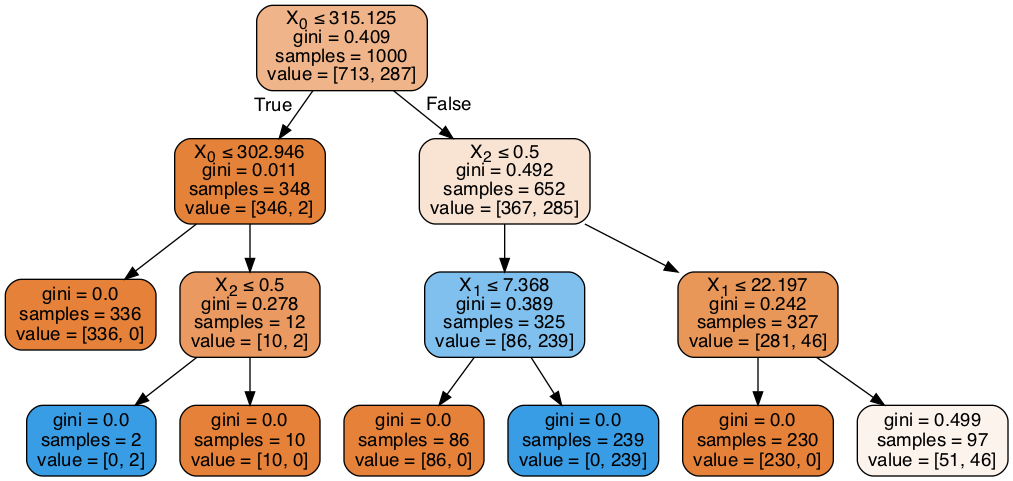

In [1]:
dot_data = StringIO()

export_graphviz(tree3, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

### Random forest classifiers



Let us see how using multiple trees help us in this case. We will be using the RandomForestClassifier class from scikit-learn.



In [1]:
from sklearn.ensemble import RandomForestClassifier

Let us first use a single decision tree with the whole data set to replicate our earlier results.

To do so, we have to also change the default hyperparameter max\_features = 'auto' to max\_features = None. This is different than in the regression approach. In regression max\_features = None and 'auto' had the same outcome, wherein all the features would be used. In this case, max\_feaures = None uses all the features. The default 'auto' uses the number of features equal to the sqrt(total features).



In [1]:
forest = RandomForestClassifier(
    n_estimators=1,
    bootstrap=False,
    random_state=3,
    max_depth=3,
    max_features=None)

forest.fit(X, y)

print('R-Squared Score:', forest.score(Xtest, ytrueTest))

R-Squared Score: 0.889

Let us now add more decision trees, with a randomized feature selection and samples selection.



In [1]:
forest = RandomForestClassifier(n_estimators =5, bootstrap = True, random_state=3, max_depth = 3, max_features = 'auto')

forest.fit(X, y)

print('R-Squared Score:', forest.score(Xtest, ytrueTest))

R-Squared Score: 0.92

Using 5 trees gave us a better output.

Let us try to visualize these 5 trees.



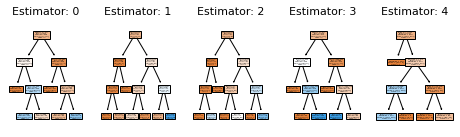

In [1]:
from sklearn import tree
fn = ['Temp', 'Pres', 'Species']
cn = 'SuperCritical'
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 2))
for index in range(0, 5):
    tree.plot_tree(forest.estimators_[index],
                   feature_names=fn,
                   class_names=cn,
                   filled=True,
                   ax=axes[index])
    axes[index].set_title('Estimator: ' + str(index), fontsize=11)

## Mleng - AKA the spAIce



There is much for to data science and machine learning than we have been able to cover this semester.



### Data visualization



This is one of the most critical capabilities in data science. We are very skilled at seeing patterns. Visualization is crucial for getting insight into the data, and in what the models mean. We focused primarily on matplotlib because it is pure Python. Many other approaches also involve Javascript, which is useful for graphics you can use in a browser, but which require knowledge of Javascript.



### Feature engineering



There are many efforts aimed at automating the search for features. These are often combinations of features, or transformed features. These methods all have to be augmented by regularization for feature selection.

The SISSO method ([https://arxiv.org/pdf/1710.03319.pdf](https://arxiv.org/pdf/1710.03319.pdf)) of feature engineering uses an algorithm to generate many (potentially billions) of features based on algebraic construction algorithms, with a heavy regularization to remove ones that are not helpful.



### So many other kinds of models



There are so many other models that are possible.



#### Graph/convolution models



Convolutional models have functions that depend on several data points, and that develop features from them to fit the data. The original versions were used on images, where convolution filters were trained for classification. These ideas have been extended to graph representations of data, where the filters are convoluted over the connected nodes to develop features based on the neighbors of a point.



#### Symbolic regression



This is a method where instead of using flexible functions like neural networks where you fit the parameters, you instead use an algorithm to search for functions to generate equations. One approach to this is the ALAMO project from Prof. Sahinidis' group, which searches for the best equations to fit data.

-   **ALAMO:** [http://archimedes.cheme.cmu.edu/?q=alamo](http://archimedes.cheme.cmu.edu/?q=alamo)

This is subtly different than the SISSO approach, which focuses on features.

There are many other approaches that leverage genetic programs, and decision trees for generating equations.



#### Reinforcement learning



This is a whole new class of machine learning models where instead of fitting models to reduce an error function, the models are trained to make decisions that maximize some kind of reward function ([https://en.wikipedia.org/wiki/Reinforcement_learning](https://en.wikipedia.org/wiki/Reinforcement_learning)). There are not many engineering applications of this method yet.



### Train, test *and* validate



We only focused on train/test splits for testing the hyperparameters *within a single model*. When you are testing many models, you can run the risk of finding a model that simply fits the test data the best. In this case it is common to split the data into three sets: train, test and validate. The validate set is only used at the end to make sure that we have not overfit to the test data.



### Modern machine learning frameworks



PyTorch and TensorFlow are the two most common Python-based machine learning frameworks. These packages leverage automatic differentiation to let you build and train very flexible models. You might wonder why we didn't learn more about these?

They are much more complex to work with, and involve a different paradigm of programming. You have to pay attention to a whole new set of things. It is easier to pick out this style of machine learning *after* you know what the algorithms are, and how they work.

Both of these are still rapidly developing, and believe it or not, a year ago it was the case that the version you start with at the beginning of a semester would be out of date by the end of the semester.

**That brings us to the end of the beginning!**

